Title:   IPython Jupyter Notebook

In [ ]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

rc('figure', figsize = (8,6))
rc('axes', labelsize='large')

This series of notebooks serves as a working reference based on Pattern Recognition and Machine Learning by Bishop

# Introduction

**Adaptive Model** - $y(x)$ which accepts data $x$ and generates an output vector $y$

**Training Data** - Set of data $\left\{x_1, x_2, \ldots, x_N\right\}$ used to tune the parameters of an adaptive model

**Target Vector** - $t$, identity category of data point, provided in training dataset or estimated by adaptive model

**Training Phase** - An adaptive model is given a training data set, during which the model parameters are changed to minimize a cost function

**Generalization** - Extending a trained adaptive model to new data

**Feature Extraction** - Reducing and/or processing a dataset to accelerate computation, while perserving valuable information

**Classification** - Method of assigning each input vector to a predetermined number of discrete categories

**Regression** - Where desired output consists of one or more continuous variables

**Supervised Learning** - An adaptive model is trained using a training data set containing the target vectors

**Unsupervised Learning** - Not providing a target vector while training a model in order to discover new categories
* **Clustering** - Discover groups of similar data 
* **Density Estimation** - Determine the generating distribution of a dataset
* **Visualization** - Project a higher dimensional dataset into a lower dimensions

**Reinforcement Learning** - Determining which actions to take in a given state in order to maximize an award (eg. gaming AI)
* **Credit Assignment** - Determining and reinforcing actions maximize the award while discarding those which do not

# Polynomial Curve Fitting

Given a set of training set of data $\mathbf{x} = \left\{x_1, x_2, \ldots, x_N\right\}^T, \mathbf{y} = \left\{y_1, y_2, \ldots, y_N\right\}^T$, seek to create an adaptive model $y(x)$ consisting of a polynomial with coefficients $w$
$$y(x,\mathbf{w}) = w_0 + w_1 x + w_2 x^2 + \ldots + w_M x^m = \sum_{j=0}^{M}w_j x^j$$
The coefficients $\mathbf{w}$ can be determined by minimzing an error function. A common choice is sum of the squares of the difference of the output variable
$$E(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^{N} \left\{ y(x_n, \mathbf{w}) - t_n\right\}^2$$

The unique solution to $w$ can be found by taking the maximizing the derivative of the error function, simplified and expressed using vector notation as 
$$ X^T X \mathbf{w} = X^T t \\
   \mathbf{w} = (X^T X)^{-1} X^T t
$$
Rewriting the error function and plugging in $w$
$$ E(w) = \frac{1}{2}(t - X w)^T (t - X w) = \frac{1}{2}(t - X (X^T X)^{-1} X^T t)^T (t - X (X^T X)^{-1} X^T t) \\ 
X (X^T X)^{-1} X^T t = X X^{-1} (X^T)^{-1} X^T t = t \\
E(w) = \frac{1}{2}(t - t)^T (t - t) = 0$$
Thus $\mathbf{w} = (X^T X)^{-1} X^T t$ minimizes $E(\mathbf{w})$, however the size $M$ of $w$ is still left unspecified. This can greatly affect the performance of the adaptive model during *generalization*

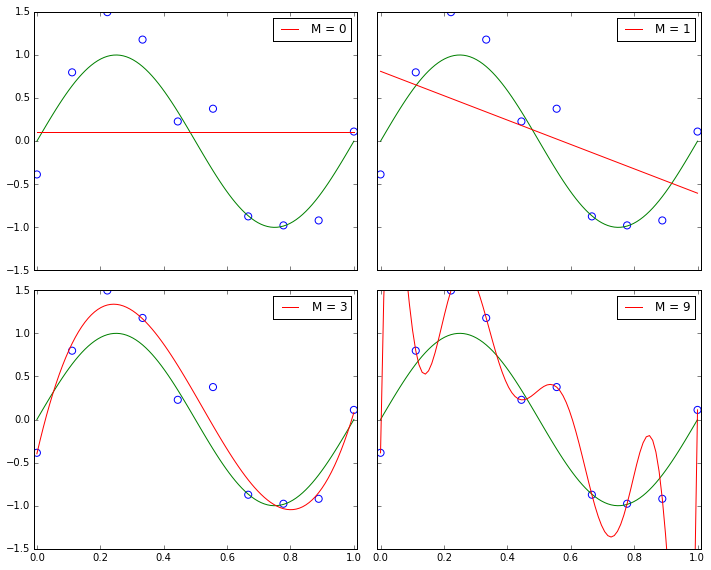

In [2]:
def distribution(N):
    x = np.linspace(0., 1., N)
    y = np.sin(2. * np.pi * x) + np.random.normal(scale=0.3, size=x.shape)
    return x, y

x_ = np.linspace(0, 1.0, 100)

N = 10
M = range(1, N+1)

x, t = distribution(N)
w = [None] * len(M)

for i, m in enumerate(M):
    X = np.transpose(np.array([np.power(x, j) for j in range(0,m)]))
    w[i] = np.dot(np.dot(inv(np.dot(X.T, X)),X.T),t)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True)
wi = [M[0], M[1], M[3], M[-1]]
for i, ax in enumerate(axs.flatten()):
    ax.scatter(x, t, s=50, edgecolors='blue', facecolors='none')
    ax.plot(x_, np.sin(2. * np.pi * x_), color='green')
    ax.plot(x_, np.polyval(w[wi[i]-1][::-1], x_), label='M = {}'.format(len(w[wi[i]-1])-1), color='red')
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlim(-0.01,1.01)
    ax.legend()

fig.tight_layout()

Now that the adaptive model has finished the training phase, we apply generalization by generating a much larger separate data set. To compare the performance between the training data and the new data the root-mean-square (RMS) error is used and defined as
$$ E_{RMS} = \sqrt{2E(\mathbf{w^{*}})/N}$$
where N is the size of the dataset

In [3]:
e_rms_training = np.array([np.sqrt(np.sum(np.power(t - np.polyval(w_[::-1], x), 2.))/N) for w_ in w])

N = 100

x_, t_ = distribution(N)
y = [np.polyval(w_[::-1], x_) for w_ in w]
e_rms = np.array([np.sqrt(np.sum(np.power(np.sin(2. * np.pi * x_) - y[i], 2.))/N) for i in range(len(y))])

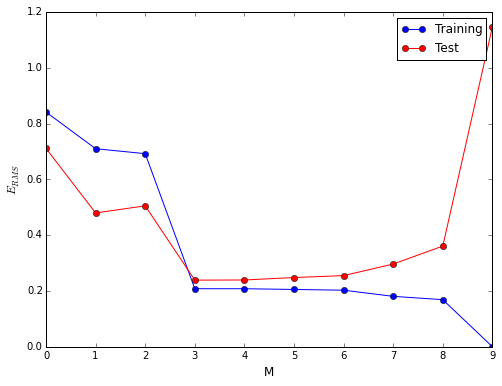

In [4]:
plt.plot(e_rms_training, marker='o', color='blue', label='Training')
plt.plot(e_rms, marker='o', color='red', label='Test')
plt.ylabel(r'$E_{RMS}$')
plt.xlabel('M')
_ = plt.legend()

Thus we see that as $M$ increases the $E_{RMS}$ decreases for the training set, however it increases for the test data set. This is referred to as *overfitting* as increasing the complexity of the model tuned it to the statistical errors in the training dataset instead of the generating distribution. The reason for this can be illustrated by looking at $w$ as $M$ increases. With greater complexity the coefficients of $w$ increase rapidly and tune to the random errors of the dataset.

In [147]:
for i, w_ in enumerate(w):
    print 'M = {}, w = '.format(i) + str(['{:.2f}'.format(i) for i in w_])

M = 0, w = ['-0.03']
M = 1, w = ['0.73', '-1.51']
M = 2, w = ['0.59', '-0.61', '-0.90']
M = 3, w = ['-0.30', '14.05', '-39.53', '25.75']
M = 4, w = ['-0.40', '17.75', '-58.21', '55.72', '-14.98']
M = 5, w = ['-0.37', '15.62', '-40.45', '5.50', '42.57', '-23.02']
M = 6, w = ['-0.33', '5.48', '84.68', '-533.04', '1083.30', '-948.76', '308.58']
M = 7, w = ['-0.35', '17.80', '-118.64', '672.67', '-2325.92', '4022.87', '-3299.36', '1030.84']
M = 8, w = ['-0.34', '-52.79', '1304.82', '-10063.91', '38177.22', '-80300.77', '95078.21', '-59200.32', '15057.79']
M = 9, w = ['-0.33', '-370.03', '8632.51', '-76067.04', '348250.70', '-925054.96', '1478310.36', '-1400848.18', '724886.45', '-157739.57']


One solution is to train on a much larger dataset. As a rule you should always have a large multiple (5 or 10) of data points compared to the number of parameters in your model. However for small sample sizes we are forced to limit our complexity which can be unsatisfying. We know that $\sin{x}$ can be represented as an infinite power series, why restrict our selves to say cubic functions when we have 10 data points.

A solution is to apply *regularization* to discourage model parameters from settling on large values. This is done by introducing a penalty term in the error function,
$$E(w) = \frac{1}{2} \sum_{n=1}^{N} \left\{ y(x_n, w) - t_n\right\}^2 + \frac{\lambda}{2}||w||^2$$
where $||w||^2 = w^T w$. The coefficient $\lambda$ governs how important the regularization term is compared with the sum-of-squares error. The new estimate with the regularization term is
$$w = (X^T X + \lambda I)^{-1} X^T t$$

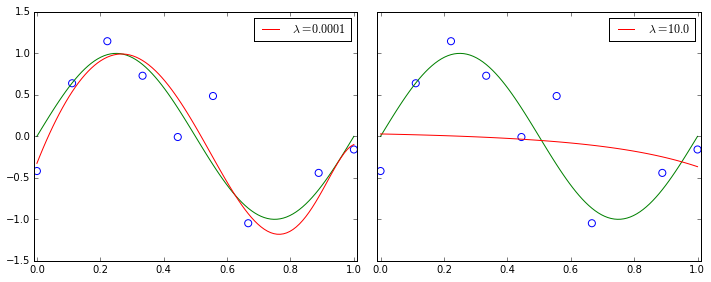

In [196]:
lamb = [0.0001, 10.]
m = M[-1]

x, t = distribution(10)

w = [None] * len(lamb)

for i, l in enumerate(lamb):
    X = np.transpose(np.array([np.power(x, j) for j in range(0,m)]))
    w[i] = np.dot(np.dot(inv(np.dot(X.T, X) + l * np.identity(m)),X.T),t)

x_ = np.linspace(0, 1.0, 100)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True, sharey=True)
for i, ax in enumerate(axs.flatten()):
    ax.scatter(x, t, s=50, edgecolors='blue', facecolors='none')
    ax.plot(x_, np.sin(2. * np.pi * x_), color='green')
    ax.plot(x_, np.polyval(w[i][::-1], x_), label=r'$\lambda = {}$'.format(lamb[i]), color='red')
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlim(-0.01, 1.01)
    ax.legend()
fig.tight_layout()

Sometimes $w_0$ is excluded from $||w||^2$ to remove any dependency on the origin of the target variable.

Looking at the coefficients of $w$, we see that the magnitude of the coefficients have been reduced

In [199]:
for i, w_ in enumerate(w):
    print 'lambda = {}, w = '.format(lamb[i]) + str(['{:.2f}'.format(i) for i in w_])

lambda = 0.0001, w = ['-0.33', '9.66', '-16.56', '-4.76', '-0.07', '4.96', '9.37', '9.20', '1.82', '-13.39']
lambda = 10.0, w = ['0.03', '-0.08', '-0.09', '-0.07', '-0.06', '-0.04', '-0.03', '-0.02', '-0.01', '-0.00']


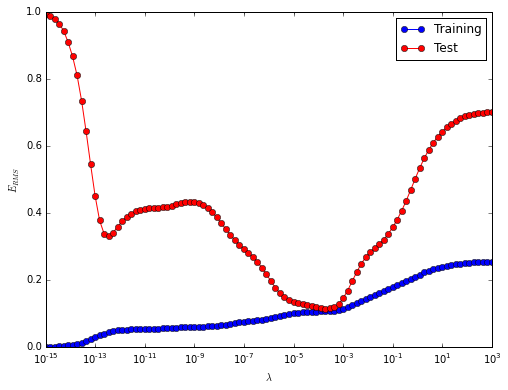

In [224]:
lamb = np.logspace(-15, 3, 100)
e_rms_training = np.zeros(lamb.shape)
e_rms = np.zeros(lamb.shape)

N = 100

x_, t_ = distribution(N)

for i, l in enumerate(lamb):
    X = np.transpose(np.array([np.power(x, j) for j in range(0,m)]))
    w = np.dot(np.dot(inv(np.dot(X.T, X) + l * np.identity(m)),X.T),t)

    e_rms_training[i] = np.sqrt(np.sum(np.power(t - np.polyval(w[::-1], x), 2.))/N)
    e_rms[i] = np.sqrt(np.sum(np.power(np.sin(2. * np.pi * x_) - np.polyval(w[::-1], x_), 2.))/N)

plt.plot(lamb, e_rms_training, marker='o', color='blue', label='Training')
plt.plot(lamb, e_rms, marker='o', color='red', label='Test')
plt.ylabel(r'$E_{RMS}$')
plt.xlabel(r'$\lambda$')
plt.xscale('log')
_ = plt.legend()

For the training dataset, $E_{RMS}$ is lowest when the penalty term is removed. However for the test dataset it obtains a minimum near 1e-4. This approach comprises two datasets. First a training dataset to determine the coefficients of $w$, and a second holdout dataset to evauluate the model complexity (M or $\lambda$). While this works there exist more sophisticated techniques which will not need to use up so much of the available training data.

# Probability Theory